In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)
import hdmedians as hd
import numpy as np
import time
import copy

Populating the interactive namespace from numpy and matplotlib


# Test Performance with Increasingly Large Matrix

In [2]:
# assume with got matrix at dimension of 500*800, after reshape to 1-dim we get 400000 length vector
vector_dim_ = 400000
const_frac = 0.25
mat_dim_range = range(5, 201, 5)
time_costs_normal = []
time_costs_const = []
time_costs_reverse = []

for dim in mat_dim_range:
    # generate normal distributed matrix
    A = np.random.randn(dim, vector_dim_)
    start_time_ = time.time()
    solution=np.array(hd.geomedian(A, axis=0))
    duration = time.time()-start_time_
    # construct a new matirx
    A_const = copy.deepcopy(A)
    shape = A_const.shape
    A_const[int(shape[0]*0.75):, :] = np.ones(A_const[int(shape[0]*0.75):, :].shape)*-100
    start_time_const_ = time.time()
    solution=np.array(hd.geomedian(A_const, axis=0))
    duration_const = time.time() - start_time_const_
    # construct another new matrix
    A_rev = copy.deepcopy(A)
    shape = A_rev.shape
    A_rev[int(shape[0]*0.75):, :] =  A_rev[int(shape[0]*0.75):, :]*-100
    start_time_rev_ = time.time()
    solution=np.array(hd.geomedian(A_rev, axis=0))
    duration_rev = time.time() - start_time_rev_ 
    
    time_costs_reverse.append(duration_rev)
    time_costs_normal.append(duration)
    time_costs_const.append(duration_const)
    print("Dim: {} Done!".format(dim))

Dim: 5 Done!
Dim: 10 Done!
Dim: 15 Done!
Dim: 20 Done!
Dim: 25 Done!
Dim: 30 Done!
Dim: 35 Done!
Dim: 40 Done!
Dim: 45 Done!
Dim: 50 Done!
Dim: 55 Done!
Dim: 60 Done!
Dim: 65 Done!
Dim: 70 Done!
Dim: 75 Done!
Dim: 80 Done!
Dim: 85 Done!
Dim: 90 Done!
Dim: 95 Done!
Dim: 100 Done!
Dim: 105 Done!
Dim: 110 Done!
Dim: 115 Done!
Dim: 120 Done!
Dim: 125 Done!
Dim: 130 Done!
Dim: 135 Done!
Dim: 140 Done!
Dim: 145 Done!
Dim: 150 Done!
Dim: 155 Done!
Dim: 160 Done!
Dim: 165 Done!
Dim: 170 Done!
Dim: 175 Done!
Dim: 180 Done!
Dim: 185 Done!
Dim: 190 Done!
Dim: 195 Done!
Dim: 200 Done!


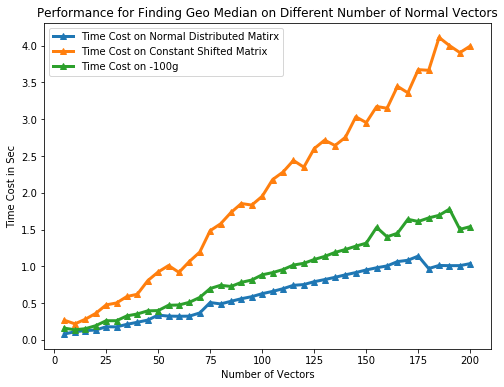

In [5]:
fig = plt.figure()
plt.plot(mat_dim_range, time_costs_normal, '-^', linewidth=3.0, label='Time Cost on Normal Distributed Matirx')
plt.plot(mat_dim_range, time_costs_const, '-^', linewidth=3.0, label='Time Cost on Constant Shifted Matrix')
plt.plot(mat_dim_range, time_costs_reverse, '-^', linewidth=3.0, label='Time Cost on -100g')
plt.legend()
plt.xlabel("Number of Vectors")
plt.ylabel("Time Cost in Sec")
plt.title("Performance for Finding Geo Median on Different Number of Normal Vectors")
plt.show()

In [30]:
mat_dim_range = range(5, 201, 5)
B = np.random.randn(200, 400)
shape = B.shape
print(B)
print
B[int(shape[0]*0.75):, :] = np.ones(B[int(shape[0]*0.75):, :].shape)*-100
print(B)

[[-0.38256564 -1.21402731 -1.32088719 ...,  0.4436518   0.33109108
   1.86389167]
 [-0.24836412  0.92193258 -0.90515369 ..., -1.80995156  0.63762342
  -0.1834358 ]
 [ 0.56709064  1.89133343 -1.05234568 ...,  1.31517612 -1.4106751
  -1.20466325]
 ..., 
 [ 1.89110228 -0.07952859 -1.50598814 ..., -1.62978008 -0.24128773
  -0.94631909]
 [-0.32655023 -0.32138918 -1.10652593 ..., -0.21606416  1.21466717
  -0.23182103]
 [-0.88967423 -0.43873439  1.62393716 ...,  0.36488906 -2.46770527
  -0.44884807]]

[[  -0.38256564   -1.21402731   -1.32088719 ...,    0.4436518     0.33109108
     1.86389167]
 [  -0.24836412    0.92193258   -0.90515369 ...,   -1.80995156
     0.63762342   -0.1834358 ]
 [   0.56709064    1.89133343   -1.05234568 ...,    1.31517612   -1.4106751
    -1.20466325]
 ..., 
 [-100.         -100.         -100.         ..., -100.         -100.         -100.        ]
 [-100.         -100.         -100.         ..., -100.         -100.         -100.        ]
 [-100.         -100.       